# **Linear Regression**

## Basic Processes in Supervised Learning

### 1. Dataset Selection and Data pre-processing
### 2. Model design/Selection and model building
### 3. Training Model
### 4. Testing and Inferring

## What is training, testing, valiadation dataset

**Training Set:**   is being used to fid the model or train the model. In other words, the data points included in the training set are used to learn the parameters of the model of interest.  In terms of size,  is typically the biggest  
**Test Set:**  is to evaluate the model. The test set is used only once when the final model is evaluated after training. It neither participates in the learning parameter process nor the hyperparameter tuning process.  
**Valiadation Set:** The validation set is used for model selection. More specifically, the validation set does not participate in the determination of learning parameters. The validation set is just for choosing hyperparameters. Validation is sometimes considered a part of the training phase.


**Suppse that students would get Y points in final exam, if they spend X hours in leanring Maching Leanring Course**

|x(hours)|y(points)|
|---|---|
| 1 | 2 |
| 2 | 4 |
| 3 | 6 |
| 4 | ? |

**The question is what would be the grade if I study 4 hours**

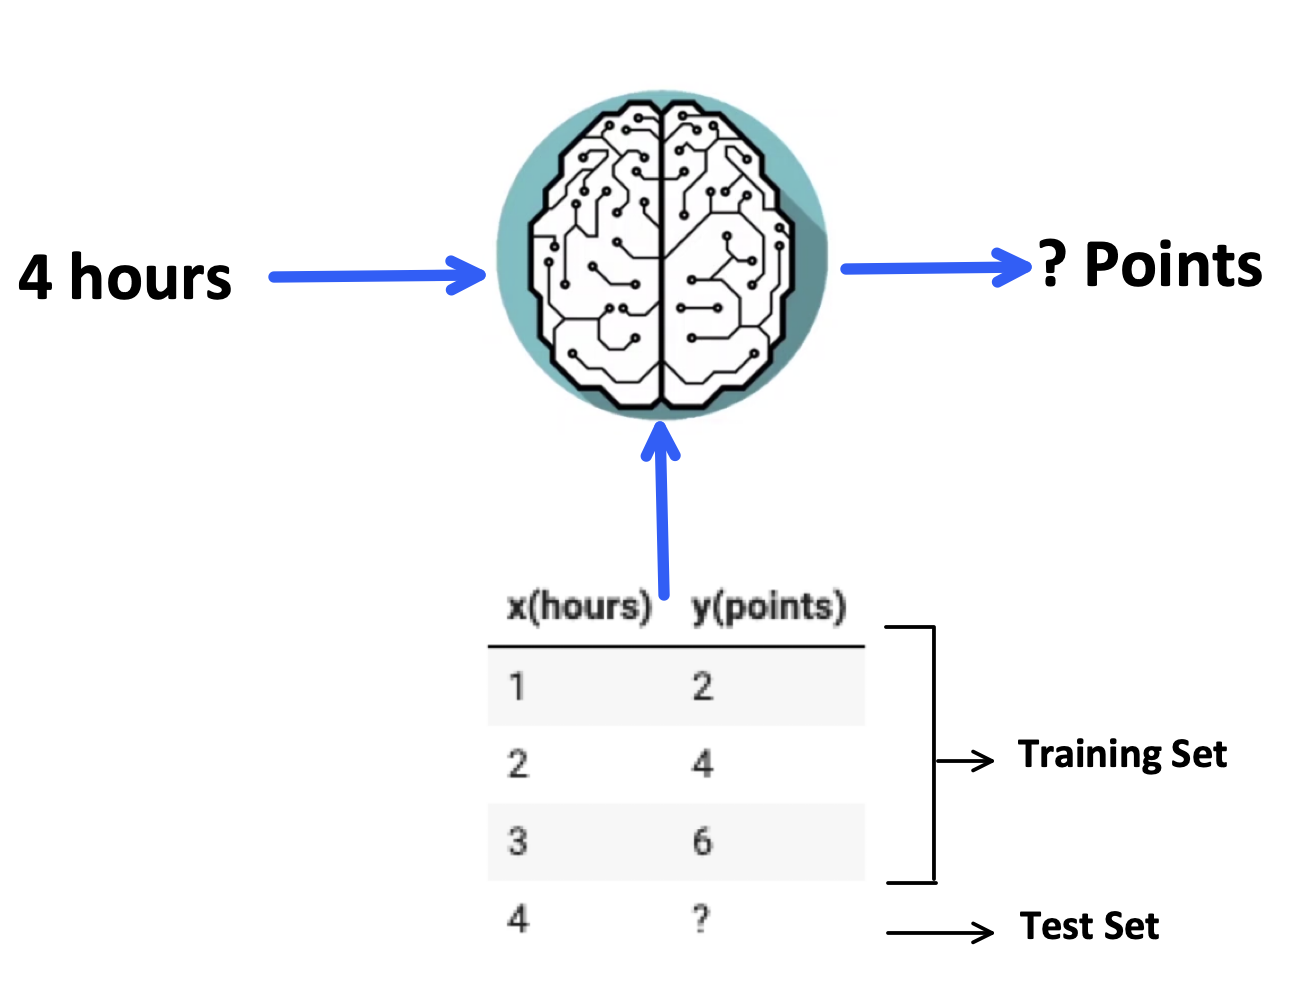

## Linear Model

**Linear Model: $\hat{y} = x * w + b$**  

To simplify the model:  
Linear Model: $\hat{y} = x * w$

In order to evaluate the model error:   
**Training loss(Error): $loss = (\hat{y} - y)^2 = (x * w -y)^2$**   --> for one sample   
Calcuate the mean of the loss:  
**Cost Fuction: Mean Square Error(MSE) $cost = $$1\over N$$ \sum_1^n$$(\hat{y}_n - y_n)^2$**  --> for whole dataset

# **Linear Regression from scratch**


import library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Define our dataset

In [ ]:
x_train = [1.0, 2.0, 3.0]
y_train = [2.0, 4.0, 6.0]

Define our forward function/linear model

In [ ]:
def forward(x):
  return x * w

Define the loss fuction

In [ ]:
def loss(x, y):
  y_pred = forward(x)
  return (y_pred - y) ** 2

Create two lists to store the value of weight and the cost value

In [ ]:
weight_list = []
mse_list = []

Implement the training process by using for loop

In [ ]:
for w in np.arange(0.0, 4.0, 0.1):
  print("W=", w)
  l_sum = 0
  for x_val, y_val in zip(x_train, y_train):
    y_pred_val = forward(x_val)
    loss_val = loss(x_val, y_val)
    l_sum += loss_val
    print('\t', x_val, y_val, y_pred_val, loss_val)
  print("MSE=", l_sum/len(x_train))
  weight_list.append(w)
  mse_list.append(l_sum/len(x_train))
  


W= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
W= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
W= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
W= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
W= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
W= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
W= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
W= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

Draw the graph 

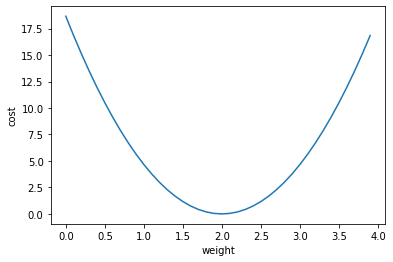

In [ ]:
plt.plot(weight_list, mse_list)
plt.xlabel("weight")
plt.ylabel("cost")
plt.show()

Exhaustive method

Calculate the cost function corresponding to all weight values, and get the best model by observing the graph.

So when $w = 2.0$ we get the best model: $\hat{y} = 2x$



As the number of learning increases, and multiple weights need to be learned at the same time, the exhaustive method is not a good solution.

In this Optimization Problem, we have Gradient Descent algorithm  
**Mean Square Error(MES) $cost(w) = $$1\over N$$ \sum_1^n$$(\hat{y}_n - y_n)^2$**  
**Optimization Problem: $w^* = arg_wmin$ $cost(w)$**   
**Gradient: $\frac{\partial cost(w)}{\partial w}$**  
**Update: $w = w - \eta \frac{\partial cost(w)}{\partial w}$**  ($\eta$ is the learning rate)  
Substitute the formula of the cost function into the weight update formula  
**Derivative: $\frac{\partial cost(w)}{\partial w} = \frac{\partial}{\partial w} \frac{1}{N} \sum_1^n (\hat{y}_n - y_n)^2$**  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$= \frac{1}{N}\sum_1^n \frac{\partial }{\partial w} (x_n * w - y_n)^2 $  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$= \frac{1}{N}\sum_1^n 2 * (x_n * w - y_n) \frac{\partial (x_n * w - y_n)}{\partial w}$  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$= \frac{1}{N}\sum_1^n 2 * x_n * (x_n * w - y_n)$  
So update formula will be:  
 $w = w - \eta \frac{1}{N}\sum_1^n 2 * x_n * (x_n * w - y_n)$


# **Implement Linear Regression with Gradient Descent from scratch**

Create the same dataset as an example

In [ ]:
x_train = [1.0, 2.0, 3.0]
y_train = [2.0, 4.0, 6.0]

Initialize the weight

In [ ]:
w = 1.0

Define our forward function/linear model

In [ ]:
def forward(x):
  return x * w

Define the cost function

In [ ]:
def cost(xs, ys):
  cost = 0
  for x, y in zip(xs, ys):
    y_pred = forward(x)
    cost += (y_pred - y) ** 2
  return cost/len(xs)

Define a function to calculate gradient

In [ ]:
def gradient(xs, ys):
  grad = 0
  for x, y in zip(xs, ys):
    grad += 2 * x * (x*w - y)
  return grad/len(xs)

Create a list to store the value of MSE

In [ ]:
mse_list = []

Implement the training process

In [ ]:
print("Predict (before training)", 4, forward(4))
for epoch in range(100):
  cost_val = cost(x_train, y_train)
  grad_val = gradient(x_train, y_train)
  w = w - 0.01 * grad_val
  print("Epoch: ", epoch, "w=", w, "loss=", cost_val)
  mse_list.append(cost_val)
print("Predict (after training)", 4, forward(4))

Predict (before training) 4 4.0
Epoch:  0 w= 1.0933333333333333 loss= 4.666666666666667
Epoch:  1 w= 1.1779555555555554 loss= 3.8362074074074086
Epoch:  2 w= 1.2546797037037036 loss= 3.1535329869958857
Epoch:  3 w= 1.3242429313580246 loss= 2.592344272332262
Epoch:  4 w= 1.3873135910979424 loss= 2.1310222071581117
Epoch:  5 w= 1.4444976559288012 loss= 1.7517949663820642
Epoch:  6 w= 1.4963445413754464 loss= 1.440053319920117
Epoch:  7 w= 1.5433523841804047 loss= 1.1837878313441108
Epoch:  8 w= 1.5859728283235668 loss= 0.9731262101573632
Epoch:  9 w= 1.6246153643467005 loss= 0.7999529948031382
Epoch:  10 w= 1.659651263674342 loss= 0.6575969151946154
Epoch:  11 w= 1.6914171457314033 loss= 0.5405738908195378
Epoch:  12 w= 1.7202182121298057 loss= 0.44437576375991855
Epoch:  13 w= 1.7463311789976905 loss= 0.365296627844598
Epoch:  14 w= 1.7700069356245727 loss= 0.3002900634939416
Epoch:  15 w= 1.7914729549662791 loss= 0.2468517784170642
Epoch:  16 w= 1.8109354791694263 loss= 0.2029231330489

Draw the plot

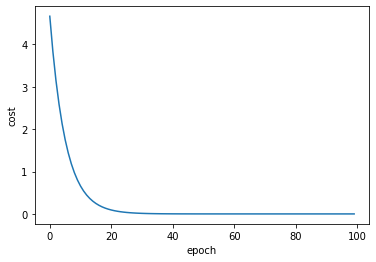

In [ ]:
plt.plot(range(100), mse_list)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()

Check the weight we learned so far

In [ ]:
w

1.9999444396553017

So when $w \approx 2.0$ we get the best model: $\hat{y} = 2x$

# **Linear Regression Scikit-Learn Example**

## Check the linear relationship betwen `year` and mean `priceperlb` per year.

import libraries

In [38]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Upload the dataset and show the head 5 lines of the dataset

In [39]:
dataset = pd.read_csv("/content/honeyproduction.csv")
dataset.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


Chech the info of the dataset

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


Calculate the average price per year, and make it a new table

In [41]:
production_pre_year = dataset[["year", "priceperlb"]].groupby('year').mean().reset_index()
production_pre_year

,year,priceperlb
0,1998,0.832558
1,1999,0.804186
2,2000,0.791395
3,2001,0.911818
4,2002,1.371364
5,2003,1.494773
6,2004,1.284634
7,2005,1.195122
8,2006,1.303659
9,2007,1.438293


Select the columns **Year** as feature/X/Input

In [53]:
X = production_pre_year['year']
X.shape
print(type(X))

<class 'pandas.core.series.Series'>


Select the columns **priceperlb** as target/label/output/Y

In [47]:
Y = production_pre_year['priceperlb']
Y

0     0.832558
1     0.804186
2     0.791395
3     0.911818
4     1.371364
5     1.494773
6     1.284634
7     1.195122
8     1.303659
9     1.438293
10    1.625610
11    1.812000
12    1.929000
13    2.167250
14    2.367000
Name: priceperlb, dtype: float64

Reshape the X, so that we can pass the X parameter to the scikit-learn Linear Regression Model


In [54]:
X = X.values.reshape(-1, 1)
X.shape

(15, 1)

Plot all observations of X and Y in a scatterplot

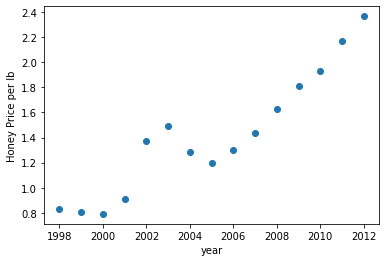

In [55]:
plt.scatter(X, Y)
plt.xlabel('year')
plt.ylabel('Honey Price per lb')
plt.show()

Instantiate a linear regression model

In [56]:
model = linear_model.LinearRegression()

Train the model

In [57]:
model.fit(X, Y)

LinearRegression()

Print out the trained weights

In [58]:
print(model.coef_)
print(model.intercept_)

[0.10313225]
-205.35825003011024


Using the trained model, make predictions on our training data

In [60]:
y_pred = model.predict(X)
print(Y)
print(y_pred)

0     0.832558
1     0.804186
2     0.791395
3     0.911818
4     1.371364
5     1.494773
6     1.284634
7     1.195122
8     1.303659
9     1.438293
10    1.625610
11    1.812000
12    1.929000
13    2.167250
14    2.367000
Name: priceperlb, dtype: float64
[0.699985   0.80311724 0.90624949 1.00938174 1.11251399 1.21564624
 1.31877849 1.42191074 1.52504299 1.62817524 1.73130749 1.83443974
 1.93757199 2.04070424 2.14383649]


Plot both predicted and true values on the same graph

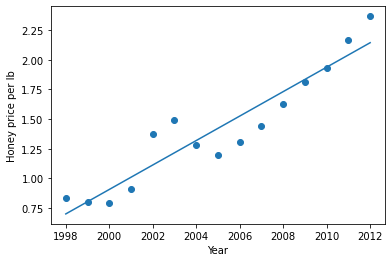

In [61]:
plt.scatter(X, Y)
plt.plot(X, y_pred)
plt.xlabel('Year')
plt.ylabel('Honey price per lb')
plt.show()

What was our hypothesis/line?

In [66]:
print(f"y= {round(model.coef_[0], 2)} * x {round(model.intercept_, 2)}")

y= 0.1 * x -205.36


Make new predict by using our trained model

In [67]:
x_new = [[2022]]
y_pred_new = model.predict(x_new)
print(y_pred_new)

[3.17515899]


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html